<h1 dir="rtl" align="center">
به نام خدا
    <br>
دانیال عرفانیان
    <br>
    ۹۷۱۱۰۱۵۵
    <br>
بررسی داده های قرآنی
</h1>

In [1]:
!pip install fasttext
!pip install camel_tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/DanialErfanian/quran-nlp
!mv quran-nlp/* .
!rm -rf quran-nlp

Cloning into 'quran-nlp'...
remote: Enumerating objects: 245, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (240/240), done.
remote: Total 245 (delta 2), reused 245 (delta 2), pack-reused 0
Receiving objects: 100% (245/245), 1.43 MiB | 9.23 MiB/s, done.
Resolving deltas: 100% (2/2), done.
mv: cannot move 'quran-nlp/fonts' to './fonts': Directory not empty
mv: cannot move 'quran-nlp/quran_text' to './quran_text': Directory not empty


In [1]:
import glob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
stopwords = set(STOPWORDS)
english_texts = ''
for file in sorted(glob.glob("quran_text/english/*.txt")):
    with open(file) as f:
        english_texts = english_texts.strip() + '\n' + f.read().strip()

In [2]:
import glob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
stopwords = set(STOPWORDS)
arabic_texts = ''
for file in sorted(glob.glob("quran_text/arabic/*.txt")):
    with open(file) as f:
        arabic_texts = arabic_texts.strip() + '\n' + f.read().strip()

In [3]:
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar

from camel_tools.utils.normalize import normalize_alef_bw
from camel_tools.utils.normalize import normalize_alef_hsb

from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar

def normalize_arabic(sentence):

    # Normalize alef variants to 'ا'
    sent_norm = normalize_unicode(sentence)
    
    sent_norm = normalize_alef_bw(sent_norm)
    # Normalize alef variants to 'ا'
    sent_norm = normalize_alef_ar(sentence)

    # Normalize alef maksura 'ى' to yeh 'ي'
    sent_norm = normalize_alef_maksura_ar(sent_norm)

    # Normalize teh marbuta 'ة' to heh 'ه'
    sent_norm = normalize_teh_marbuta_ar(sent_norm)
    return dediac_ar(sent_norm)

In [4]:
import codecs

stopwords_path = 'quran_text/quranic_stopwords.txt'
stopwords = [x.strip() for x in codecs.open(stopwords_path,'r','utf-8').readlines()]
stopwords = stopwords + [normalize_arabic(x.strip()) for x in codecs.open(stopwords_path,'r','utf-8').readlines()]
normalized_arabic = ' '.join([word for word in normalize_arabic(arabic_texts).split() if word not in stopwords])

In [5]:
def create_word_cloud(text):
    wordcloud = WordCloud(width = 800, height = 800, font_path='./fonts/Amiri Bold.ttf',
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

<h3 dir="rtl">
    کلمات پر کاربرد در متن عربی کل قرآن:
</h3>

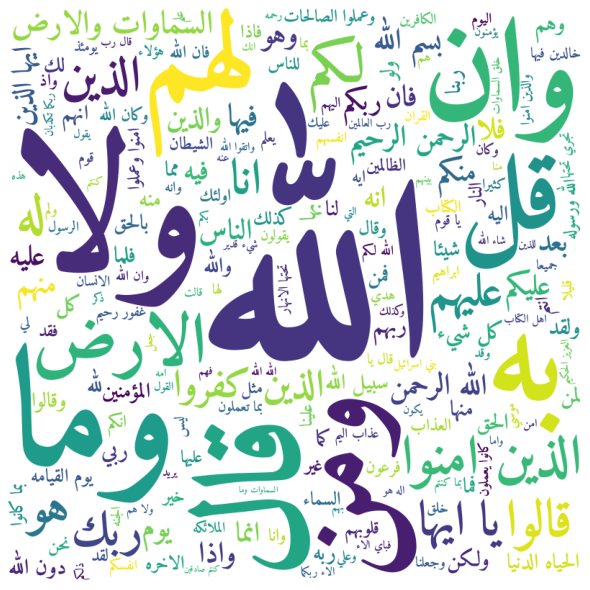

In [6]:
create_word_cloud(normalized_arabic)

<h3 dir="rtl">
    کلمات پر کاربرد در ترجمه انگلیسی کل قرآن:
</h3>

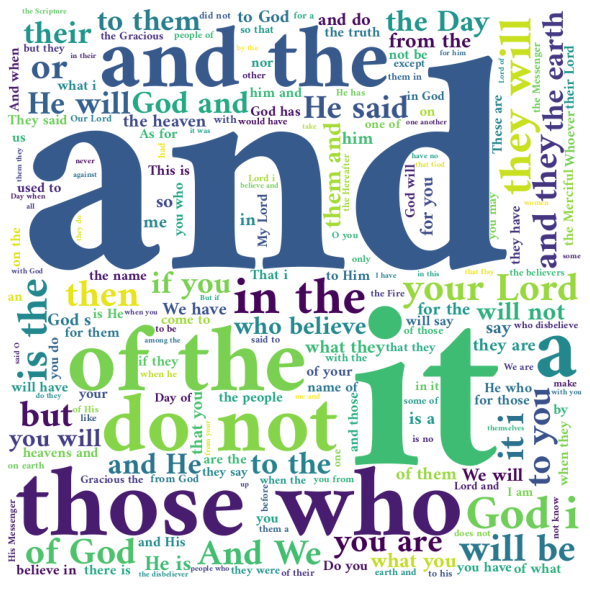

In [7]:
create_word_cloud(english_texts)

<hr/>


<h2 dir="rtl" align="center">
بررسی سوره های فجر و الحاقه
</h2>

In [8]:
def clean_ayah(text):
    return ' '.join([word for word in normalize_arabic(text.strip()).split() if word not in stopwords])
def clean_surah(texts):
    return [clean_ayah(ayah) for ayah in texts]

with open('./quran_text/arabic/089.txt') as f:
    fajr_text = f.readlines()
fajr_text = clean_surah(fajr_text)

with open('./quran_text/arabic/069.txt') as f:
    elhagheh_text = f.readlines()
elhagheh_text = clean_surah(elhagheh_text)

In [9]:
print(fajr_text)
print("-"*100)
print(elhagheh_text)

['بسم الله الرحمن الرحيم', 'والفجر', 'وليال عشر', 'والشفع والوتر', 'والليل يسر', 'قسم لذي حجر', 'تر كيف فعل ربك بعاد', 'ارم ذات العماد', 'التي يخلق مثلها البلاد', 'وثمود الذين جابوا الصخر بالواد', 'وفرعون ذي الاوتاد', 'الذين طغوا البلاد', 'فاكثروا فيها الفساد', 'فصب عليهم ربك سوط عذاب', 'ربك لبالمرصاد', 'فاما الانسان ابتلاه ربه فاكرمه ونعمه فيقول ربي اكرمن', 'واما ابتلاه فقدر عليه رزقه فيقول ربي اهانن', 'ۖ تكرمون اليتيم', 'ولا تحاضون طعام المسكين', 'وتاكلون التراث اكلا', 'وتحبون المال حبا جما', 'دكت الارض دكا دكا', 'وجاء ربك والملك صفا صفا', 'وجيء يومئذ بجهنم ۚ يومئذ يتذكر الانسان واني له الذكري', 'يقول يا ليتني قدمت لحياتي', 'فيومئذ يعذب عذابه احد', 'ولا يوثق وثاقه احد', 'يا ايتها النفس المطمئنه', 'ارجعي ربك راضيه مرضيه', 'فادخلي عبادي', 'وادخلي جنتي']
----------------------------------------------------------------------------------------------------
['بسم الله الرحمن الرحيم', 'الحاقه', 'الحاقه', 'وما ادراك الحاقه', 'كذبت ثمود وعاد بالقارعه', 'فاما ثمود فاهلكوا بالطاغيه', 'واما عاد ف

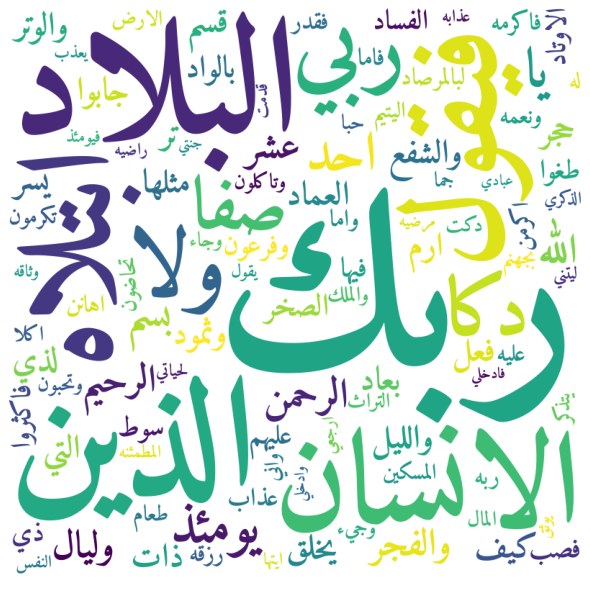

In [10]:
create_word_cloud(' '.join(fajr_text))

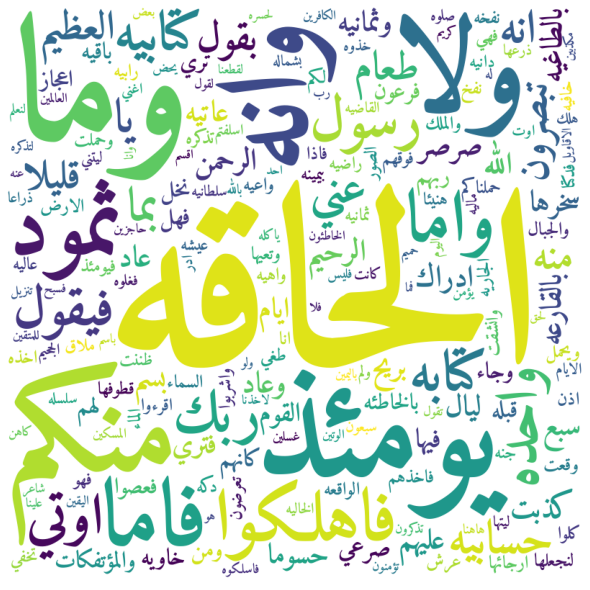

In [11]:
create_word_cloud(' '.join(elhagheh_text))

<hr/>


<div dir="rtl" style="font-size: 16px">
برای بررسی شباهت متن و پیدا کردن قسمت هایی که به موضوعات یکسانی اشاره دارند من ۲ ایده دارم:
    <br>
    <ul>
    <li>
        ایده ۱: پیدا کردن شباهت دو به دو بین آیه های سوره ها
    </li>
    <li>
        ایده ۲: تلاش کنیم یک قسمت ۱۵ کلمه ای که معانی نزدیکی دارند را پیدا کنیم
    </li>
    </ul>
    ما در اینجا سعی میکنیم هر دو ایده را پیاده کنیم
</div>

In [12]:
import fasttext.util
import fasttext
import numpy as np

class FastText:
    def __init__(self):
        fasttext.util.download_model('ar', if_exists='ignore')  # Arabic
        self.ft = fasttext.load_model("./cc.ar.300.bin")

    def tokens_to_vec(self, tokens):
        cur_vectors = []
        if len(tokens) == 0:
            return np.zeros(self.ft.get_dimension())
        for token in tokens:
            cur_vectors.append(self.ft.get_word_vector(token))
        return np.average(cur_vectors, axis=0)

    @staticmethod
    def cosine_sim(a, b):
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        if norm_a == 0 or norm_b == 0:
            return 0
        cos_sim = np.dot(a, b) / (norm_a * norm_b)
        return cos_sim

    def similarity(self, text1, text2):
        vec1 = self.tokens_to_vec(text1.split())
        vec2 = self.tokens_to_vec(text2.split())
        return self.cosine_sim(vec1, vec2)
fasttext = FastText()

In [17]:
def approach_2():
    fajr_all_text = ' '.join(fajr_text).split()
    elhagheh_all_text = ' '.join(elhagheh_text).split()

    word_slide_size = 8
    results = []
    for i in range(len(fajr_all_text)):
        for j in range(len(elhagheh_all_text)):
            if (
                    (i + word_slide_size) >= len(fajr_all_text) or
                    (j + word_slide_size) > len(elhagheh_all_text)
            ):
                continue
            text1 = ' '.join(fajr_all_text[i: i + word_slide_size])
            text2 = ' '.join(elhagheh_all_text[j: j + word_slide_size])
            results.append(
                [
                    fasttext.similarity(
                        text1,
                        text2,
                    ),
                    text1,
                    text2,
                ]
            )
    return results


def approach_1():
    results = []
    for text1 in fajr_text:
        for text2 in elhagheh_text:
            results.append(
                [
                    fasttext.similarity(
                        text1,
                        text2,
                    ),
                    text1,
                    text2,
                ]
            )
    return results
print(*list(reversed(sorted(approach_1())))[:5], sep='\n')
print("-"*100)
print(*list(reversed(sorted(approach_2())))[:5], sep='\n')

[1.0, 'بسم الله الرحمن الرحيم', 'بسم الله الرحمن الرحيم']
[0.9115014, 'ولا تحاضون طعام المسكين', 'ولا طعام غسلين']
[0.8531163, 'ربك لبالمرصاد', 'فسبح باسم ربك العظيم']
[0.82313323, 'ولا تحاضون طعام المسكين', 'ولا يحض طعام المسكين']
[0.82200354, 'يا ايتها النفس المطمئنه', 'يا ليتها كانت القاضيه']
----------------------------------------------------------------------------------------------------
[0.8371013, 'وجيء يومئذ بجهنم ۚ يومئذ يتذكر الانسان واني', 'السماء فهي يومئذ واهيه والملك ارجائها ۚ ويحمل']
[0.83183193, 'وجيء يومئذ بجهنم ۚ يومئذ يتذكر الانسان واني', 'وانشقت السماء فهي يومئذ واهيه والملك ارجائها ۚ']
[0.82531136, 'ۚ يومئذ يتذكر الانسان واني له الذكري يقول', 'شاعر ۚ قليلا تؤمنون ولا بقول كاهن ۚ']
[0.82336605, 'يومئذ بجهنم ۚ يومئذ يتذكر الانسان واني له', 'السماء فهي يومئذ واهيه والملك ارجائها ۚ ويحمل']
[0.82031286, 'بجهنم ۚ يومئذ يتذكر الانسان واني له الذكري', 'شاعر ۚ قليلا تؤمنون ولا بقول كاهن ۚ']
